# Chapter 3

### Import MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
import pandas as pd
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

### Look at one digit from the dataset

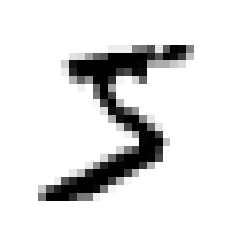

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

some_digit = X.iloc[0]
some_digit_array = some_digit.array
some_digit_image = some_digit_array.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [5]:
y[0]

'5'

### Cast y to an integer

In [6]:
y = y.astype(np.uint8)

#### The data is already split into a training set (the first 60,000 images) and a test set (the last 10,000 images). We don't have to worry about cross-validation.

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

### Try to identify the number 5 - this is a binary classifier

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Pick a classifier and train it - start with Stochastic Gradient Descent (SGD) Classifier
- This classifier has the advantage of being capable of handling very large datasets efficiently
- SGD deals with training instances independently, one at a time
- SGD is well suited for online learning

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# Performance Measures

- Evaluating a classifier is often significantly trickier than evaluating a regrosser.
- There are many performance measures available
- A good way to evaluate a model is to use cross-validation

### Measuring Accuracy Using Cross-Validation

In [11]:
# The following code does roughly the same thing as Scikit-Learn's cross_val_score() function

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

KeyError: "None of [Int64Index([    1,     3,     4,     5,     7,     8,    10,    11,    12,\n               13,\n            ...\n            59984, 59985, 59987, 59988, 59989, 59991, 59993, 59994, 59996,\n            59998],\n           dtype='int64', length=40000)] are in the [columns]"

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [15]:
# very dumb classifier that classifies all images in the not-5 category

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
        
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

### Confusion Matrix
- A much better way to evaluate the performance of a classifier is to look at the confusion matrix
- To compute the confusion matrix, you first need to have a set of predictions so that they can be compared to the actual targets
- Use the cross_val_predict() function

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

- Each row in a confusion matrix represets an actual class, while each column represents a predicted class
- 53,892 of the negative class were correctly classified as non-5s (true negatives)
- 687 of the negative class were wrongly classified as 5s (false positive)
- 1891 of the positive class were wrongly classified as non-5s (false negative)
- 3530 were correctly classified as 5s (true positive)

In [18]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

### Precision
- Accuracy of the positive predictions
- TP / (TP + FP)

### Recall or Sensitivity or True Positive Rate
- the ratio of positive instances that are correctly detected by the classifier
- TP / TP + FN

In [19]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [20]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

### Harmonic Mean of Precision and Recall
- It is often convenient to combine precision and recall into a single metric called the F1 Score
- Harmonic mean gives much more weight to low values
- The classifier will only get a high F1 score if both recall and precision are high
- The f1 score favors classifiers that have similar precision and recall

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Precision / Recall Tradeoff

In [23]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [25]:
threshold = 0 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [26]:
# Raise the threshold

threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [27]:
# Find the best threshold to use

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

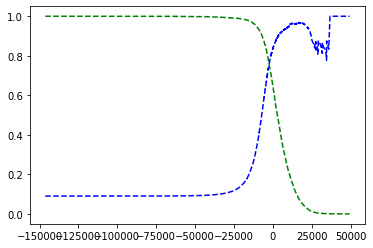

In [29]:
# Plot precision and recall as functions of the threshold value

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [31]:
# find the lowest threshold where you get at least 90% precision

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.019499143958

In [33]:
# make predictions without calling the classifier predict() method

y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [34]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [35]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

### The ROC Curve
- Another common tool used with binary classifiers
- Very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate against the false positive rate
- FPR is the ratio of negative instances that are incorrectly classified as positive (sensitivity)
- TNR is the ratio of negative instances that are correctly classified as negative (specificity)
- ROC Curve plots sensitivity vs 1 - specificity

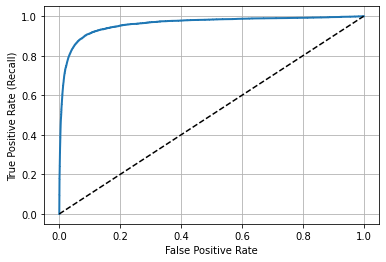

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--') # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)

    
plot_roc_curve(fpr, tpr)
plt.show()

### Area Under the Curve
- A perfect classifier will have a ROC area under the curve equal to 1, while a purely random classifier will have a ROC AUC equal to 0.5
- As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives. Otherwise, use the ROC curve.

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

### Train a RandomForestClassifier
- RandomForestClassifier does not have a decision_function method
- Instead it has a predict_proba() method
- Scikit-Learn classifiers generally have one or the other or both
- The predict-proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class

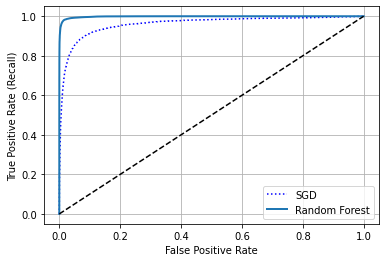

In [45]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

# the roc_curve() function can take probabilities

y_scores_forest = y_probas_forest[:,1] # score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [46]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

### Multiclass Classification
- AKA multinomial classifiers
- Can distinguish between more than two classes
- Some algorithms (SGD classifiers, Random Forest classifiers, and naive Bayes classifiers) are capable of handling multiple classes natively
- Others (Logistic Rgression or SVM) are strictly binary classifiers
- Workaround: you could train 10 binary classifiers, one for each digit (One versus the rest or one versus all strategy)
- Another strategy: train a binary classifier for every pair of digits (one versus one)
- Some algorithms (such as SVM) scale poorly with the size of the training set. For these, the one versus one method is preferred
- For most binary classification algorithms, one versus the rest is preferred
- Scikit-Learn detects when you try to use a binary classification algorithm for a multi-class classification task. It automatically runs one vs. the rest or one vs. one, depending on the algorithsm.

In [49]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

# Used the OvO strategy and trained 45 binary classifiers, got their decision scores,
# and selected the class that won the most duels

/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [50]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [56]:
svm_clf.classes_

# When a classifier is trained, it stores the list of traget classes in its classes_ attribute

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [55]:
svm_clf.classes_[5]

5

In [57]:
np.argmax(some_digit_scores)

5

### Force Scikit-Learn to use OvO or OvR
- Use OneVsOneClassifier or OneVsRestClassifier

In [59]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [60]:
ovr_clf.predict([some_digit])

/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-package

array([5], dtype=uint8)

In [61]:
len(ovr_clf.estimators_)

10

### Train an SGDClassifier for multiple classes

In [62]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])
# Scikit-Learn did not have to run OvO or OvR because SGD classifiers can directly classify instances into multiple classes

/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [63]:
sgd_clf.decision_function([some_digit])

/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [64]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

KeyboardInterrupt: 

In [69]:
# Scale the inputs to improve accuracy

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

KeyboardInterrupt: 

### Error Analysis

In [65]:
# Look at confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_trian_pred)
conf_mx

NameError: name 'X_train_scaled' is not defined

In [ ]:
# Plot an image representation of the confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
# Plot the proportion of errors instead of absolute number of errors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Fill the diagonal with zeros to keep only the errors, and plot the rest
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
# Analyze individual errors

cl_a, cl_b = 3, 5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

### Multilabel Classification
- Until now each instance has always been assigned to just one class
- In some cases you may want your classifier to output multiple classes for each instance
- Not all classifiers support multilabel classification - KNeighbors does

In [70]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])


/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [71]:
# Evaluate the classifier

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

# This assumes that all labels are equally important
# If you want to give more weight to one of the labels, you can give each label a weight, set average = "weighted"

0.976410265560605

### Multioutput Classification
- multioutput, multiclass classification

In [74]:
# Create a training and test set with added noise using randint()

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [79]:
# Train the classifier to clean the image

knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict(X_test_mod[some_digit])
plot_digit(clean_digit)

KeyError: "None of [Float64Index([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,\n              ...\n              0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],\n             dtype='float64', length=784)] are in the [columns]"